# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [201]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [32]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

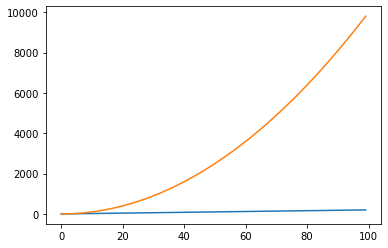

In [21]:
#the first way is to plot using plt.plot. We generate two plots and then plot them together
plt.plot(x,y)
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

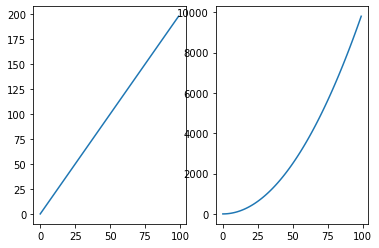

In [20]:
# Using subplots to create a 2 figures of for the 3 axis (x,y) and (x,z).
fig, array_subplots = plt.subplots(nrows=1,ncols=2)

#array_subplots is a (1,2) array, or 2 element array, with which we can plot each graphic individualy.
array_subplots[0].plot(x,y)
array_subplots[1].plot(x,z)

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

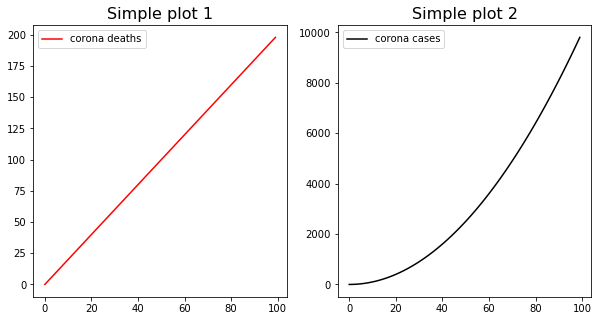

In [60]:
x = np.arange(0,100)
y = x*2
z = x**2

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

ax1.plot(x,y,color='r',label = 'corona deaths')
ax1.set_title('Simple plot 1',fontsize=16)
ax1.legend()

ax2.plot(x,z,color='black',label = 'corona cases')
ax2.set_title('Simple plot 2',fontsize=16)
ax2.legend()



plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

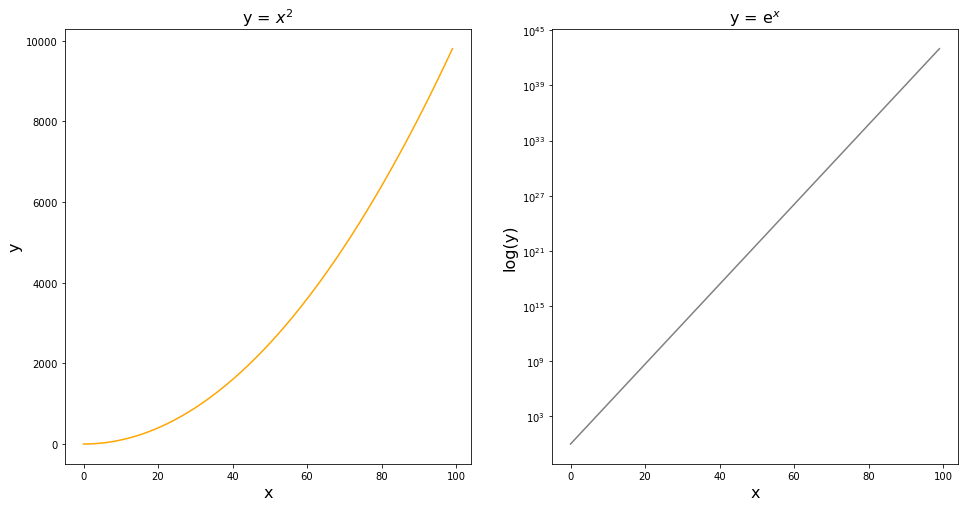

In [80]:
# your code here
x = np.arange(0,100)
y = x**2
z = np.exp(x)

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,8))

#seting up first graph
ax1.plot(x,y,color='orange')
ax1.set_title('y = $x^2$',fontsize=16)
ax1.set_xlabel('x',fontsize=16)
ax1.set_ylabel('y',fontsize=16)

#seting up second graph
ax2.plot(x,z,color='gray')
ax2.set_yscale('log')
ax2.set_title('y = e$^x$',fontsize=16)
ax2.set_xlabel('x',fontsize=16)
ax2.set_ylabel('log(y)',fontsize=16)

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

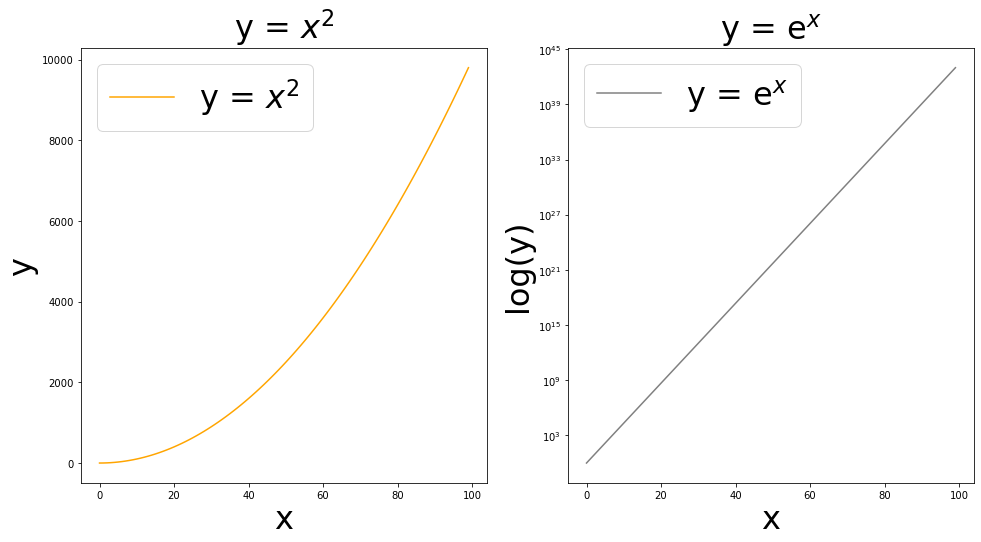

In [86]:
# your code here
x = np.arange(0,100)
y = x**2
z = np.exp(x)

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,8))

#seting up first graph
ax1.plot(x,y,color='orange',label='y = $x^2$')
ax1.set_title('y = $x^2$',fontsize=32)
ax1.set_xlabel('x',fontsize=32)
ax1.set_ylabel('y',fontsize=32)
ax1.legend(fontsize=32)

#seting up second graph
ax2.plot(x,z,color='gray',label='y = e$^x$')
ax2.set_yscale('log')
ax2.set_title('y = e$^x$',fontsize=32)
ax2.set_xlabel('x',fontsize=32)
ax2.set_ylabel('log(y)',fontsize=32)
ax2.legend(fontsize=32)

plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. 
* db: `fitbit`
* table: `fitbit2`

In [155]:
# your code here
fitbit = pd.read_csv('../Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

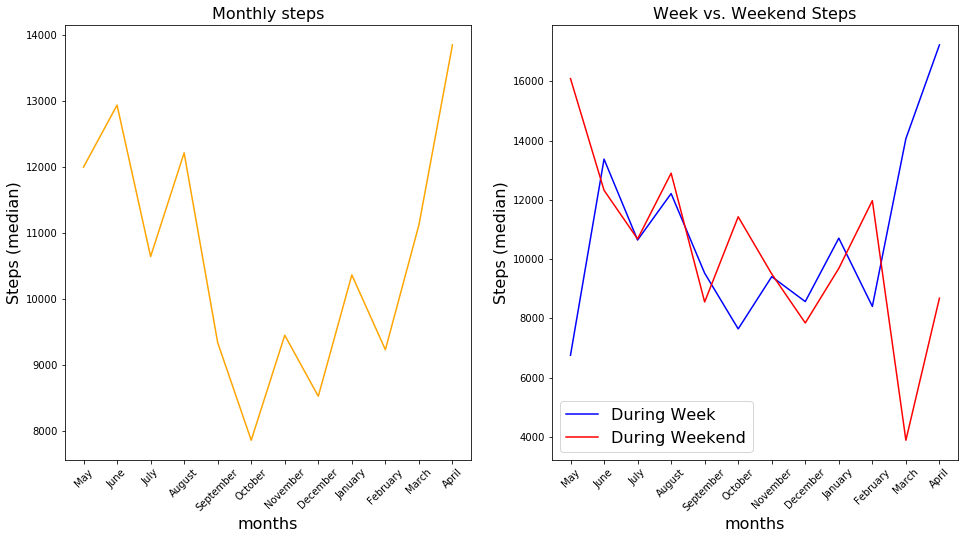

In [170]:
# MEDIAN STEPS BY MONTH_ENCODED
monthly_steps = fitbit.groupby(by='Months',sort=False).median().loc[:,['Steps']].reset_index()
data = fitbit.groupby(by=['Work_or_Weekend','Months'],sort=False).median().loc[:,'Steps']
week_data = data[1].reset_index()
weekend_data = data[0].reset_index()

# MEDIAN STEPS BY WORK_OR_WEEKEND
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,8))

#seting up first graph
ax1.plot(monthly_steps.iloc[:,0],monthly_steps.iloc[:,1],color='orange')
ax1.set_title('Monthly steps',fontsize=16)
ax1.set_xlabel('months',fontsize=16)
ax1.set_ylabel('Steps (median)',fontsize=16)

#seting up second graph
ax2.plot(week_data.iloc[:,0],week_data.iloc[:,1],color='blue',label='During Week')
ax2.plot(weekend_data.iloc[:,0],weekend_data.iloc[:,1],color='red',label='During Weekend')
ax2.set_title('Week vs. Weekend Steps',fontsize=16)
ax2.set_xlabel('months',fontsize=16)
ax2.set_ylabel('Steps (median)',fontsize=16)
ax2.legend(fontsize=16)

#seting up second graph3
plt.sca(ax1)
plt.xticks(rotation=45)

plt.sca(ax2)
plt.xticks(rotation=45)
plt.show()

# Save the full figure...
fig.savefig('full_figure.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

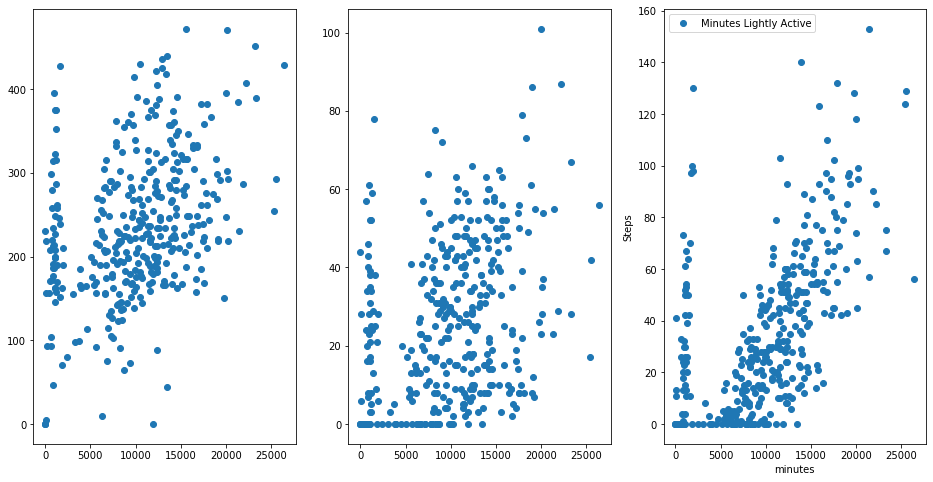

In [188]:
lightly_active =  fitbit.loc[:,['Steps','Minutes Lightly Active']]
fairly_active =  fitbit.loc[:,['Steps','Minutes Fairly Active']]
very_active =  fitbit.loc[:,['Steps','Minutes Very Active']]

fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(16,8))
tpl = (ax1,ax2,ax3)
i = 0

for data in [lightly_active,fairly_active,very_active]:
    tpl[i].scatter(data.iloc[:,0],data.iloc[:,1])
    i+=1
    

plt.legend(['Minutes Lightly Active', 'Minutes Fairly Active','Minutes Very Active'])
plt.xlabel('minutes')
plt.ylabel('Steps')

plt.show()


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. 
* db: `titanic`
* table: `titanic`

In [190]:
# your code here
titanic = pd.read_csv('../titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [192]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [203]:
# NUMERICAL VARIABLES
num_titanic = titanic.select_dtypes(include=['float64','int64'])

In [202]:
# CATEGORICAL VARIABLES
cat_titanic = titanic.select_dtypes(include=['object'])

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [205]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

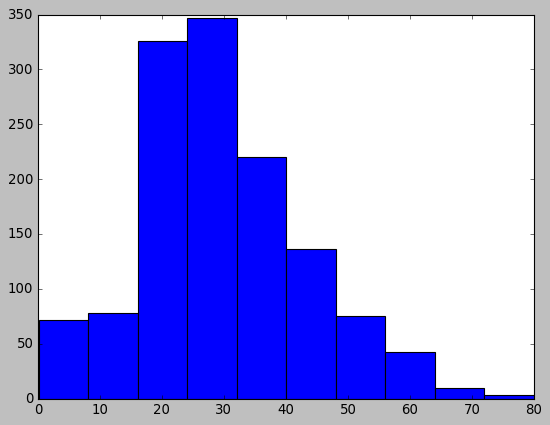

In [206]:
# your code here
plt.hist(num_titanic.Age)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

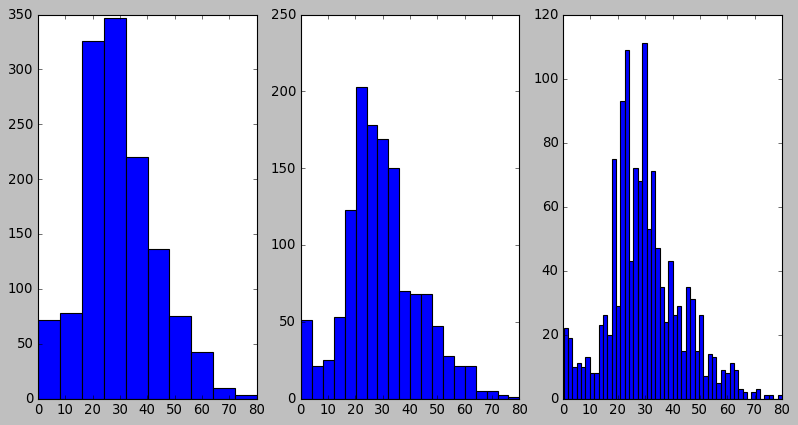

In [209]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(12,6))

ax1.hist(num_titanic.Age, bins=10)

ax2.hist(num_titanic.Age, bins=20)

ax3.hist(num_titanic.Age,bins=50)

plt.show()

#### How does the bin size affect your plot?

In [0]:
"""
In short: Changing bin number affect our description of the shape, center, and spread of the dataset.

In long:
The bin width (and thus number of categories or ranges) affects the ability of a histogram 
to identify local regions of higher incidence. Too large, and you will not get enough differentiation.
Too small, and the data cannot be grouped.

A good histogram will show areas of higher incidence of a parameter that may help us 
to identify causative factors in a system. Thus, inappropriate bin size will defeat the 
purpose of the histogram. The extremes may help visualize the effect. 
ONE 'bin' only shows the population or total sample size.
A 'bin' for each sample point gives us no more information, but only stretches the width of the chart.

A good bin width will usually show a recognizable normal probability distribution curve, 
unless the data is really multi-modal. Then there could be two or more distinct 'humps' in the histogram chart.

"""

#### Use seaborn to show the distribution of column `Age`.

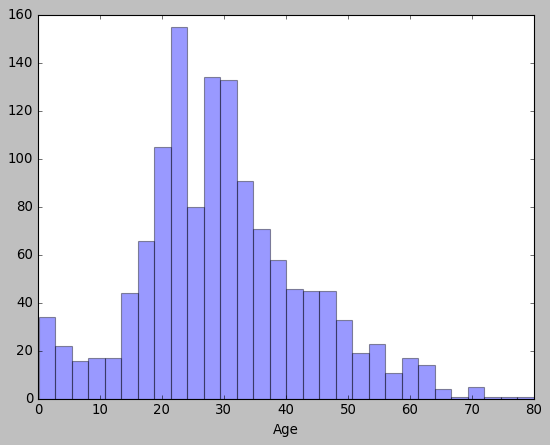

In [213]:
# your code here
sns.distplot(num_titanic.Age,kde=False)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

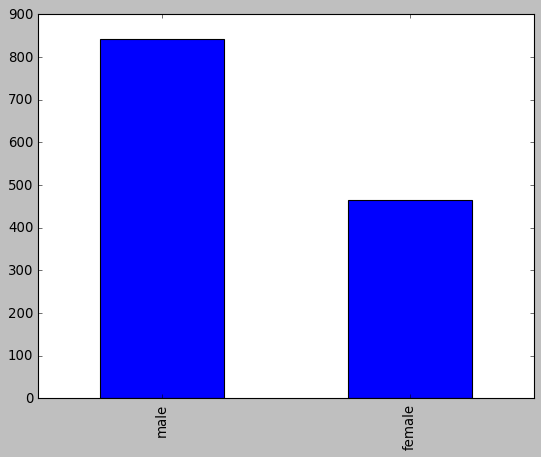

In [259]:
# Method 1 - matplotlib
# your code here
numbers=cat_titanic.Gender.value_counts()

# plt.bar(x=(numbers.index[0],numbers.index[1]),height=[numbers[0],numbers[1]])

numbers.plot(kind='bar')

plt.show()

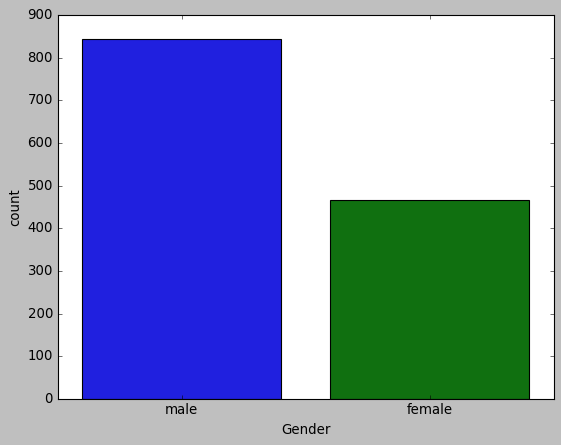

In [222]:
# Method 2 - seaborn
sns.countplot(cat_titanic.Gender)
plt.show()

#### Use the right plot to visualize the column `Pclass`.

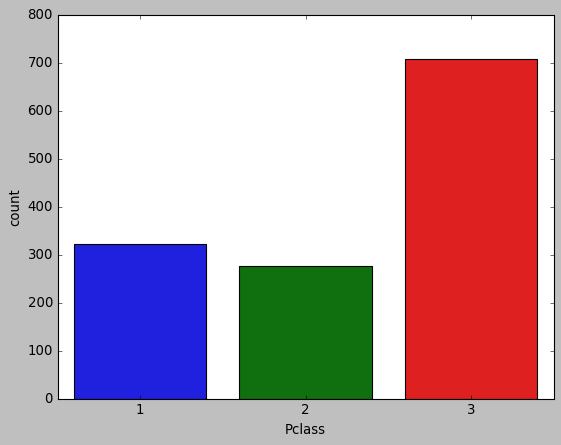

In [226]:
# your code here
sns.countplot(num_titanic.Pclass)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

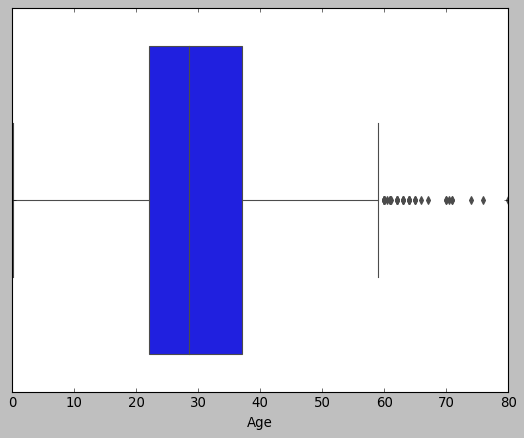

In [282]:
# your code here
sns.boxplot(num_titanic.Age)
plt.show()

In [0]:
"""
A boxplot is a graph that gives you a good indication of how the values in the data are spread out. 
Although boxplots may seem primitive in comparison to a histogram or density plot, 
they have the advantage of taking up less space, which is useful when comparing distributions
between many groups or datasets.
"""

#### What does the last plot tell you about the feature `Age`?

In [0]:
"""
Quite few people on titanic where older than 60 years.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [287]:
type(num_titanic.Age)

pandas.core.series.Series

[]

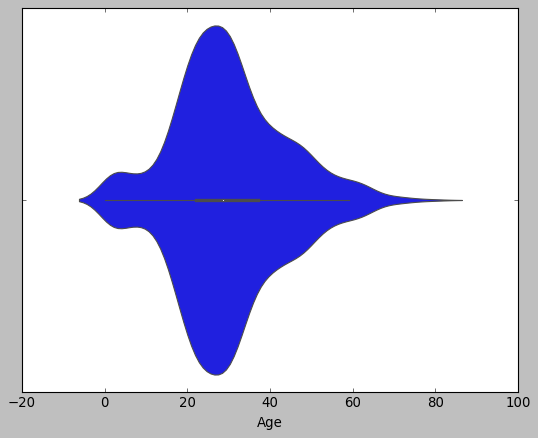

In [294]:
# your code here
sns.violinplot('Age',data=num_titanic)
plt.plot()

#### What additional information does the last plot provide about feature `Age`?

In [298]:
titanic.sort_values(by='Age',ascending=False)

PassengerId  Survived  Pclass  \
630           631       1.0       1   
987           988       NaN       1   
851           852       0.0       3   
96             97       0.0       1   
493           494       0.0       1   
...           ...       ...     ...   
1172         1173       NaN       3   
755           756       1.0       2   
803           804       1.0       3   
1092         1093       NaN       3   
1245         1246       NaN       3   

                                                   Name  Gender    Age  SibSp  \
630                Barkworth, Mr. Algernon Henry Wilson    male  80.00      0   
987   Cavendish, Mrs. Tyrell William (Julia Florence...  female  76.00      1   
851                                 Svensson, Mr. Johan    male  74.00      0   
96                            Goldschmidt, Mr. George B    male  71.00      0   
493                             Artagaveytia, Mr. Ramon    male  71.00      0   
...                                                 ...     ...    ...    ...   
1172                     Peacock, Master. Alfred Edward    male   0.75      1   
755                           Hamalainen, Master. Viljo    male   0.67      1   
803                     Thomas, Master. Assad Alexander    male   0.42      0   
1092            Danbom, Master. Gilbert Sigvard Emanuel    male   0.33      0   
1245            Dean, Miss. Elizabeth Gladys Millvina""  female   0.17      1   

      Parch              Ticket     Fare Cabin Embarked  
630       0               27042  30.0000   A23        S  
987       0               19877  78.8500   C46        S  
851       0              347060   7.7750    U0        S  
96        0            PC 17754  34.6542    A5        C  
493       0            PC 17609  49.5042    U0        C  
...     ...                 ...      ...   ...      ...  
1172      1  SOTON/O.Q. 3101315  13.7750    U0        S  
755       1              250649  14.5000    U0        S  
803       1                2625   8.5167    U0        C  
1092      2              347080  14.4000    U0        S  
1245      2           C.A. 2315  20.5750    U0        S  

[1309 rows x 12 columns]

In [0]:
"""
That maybe
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

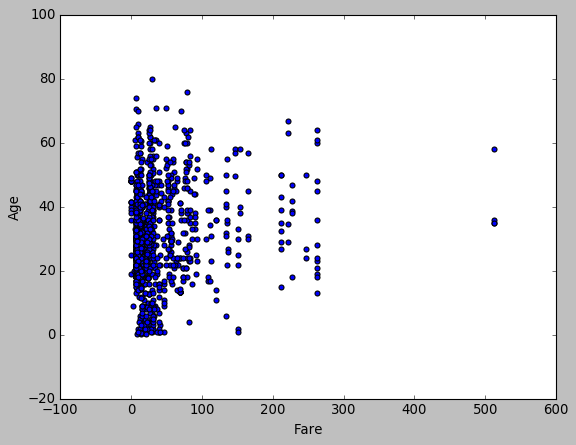

In [301]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Fare,y=titanic.Age)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

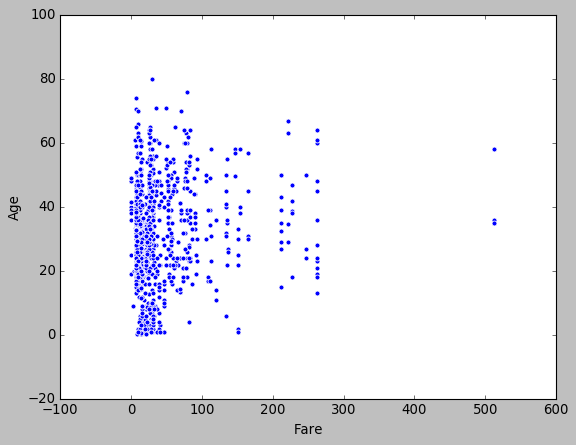

In [305]:
# Method 2 - seaborn
sns.scatterplot('Fare','Age',data=titanic)
plt.show()

#### Plot the correlation matrix using seaborn.

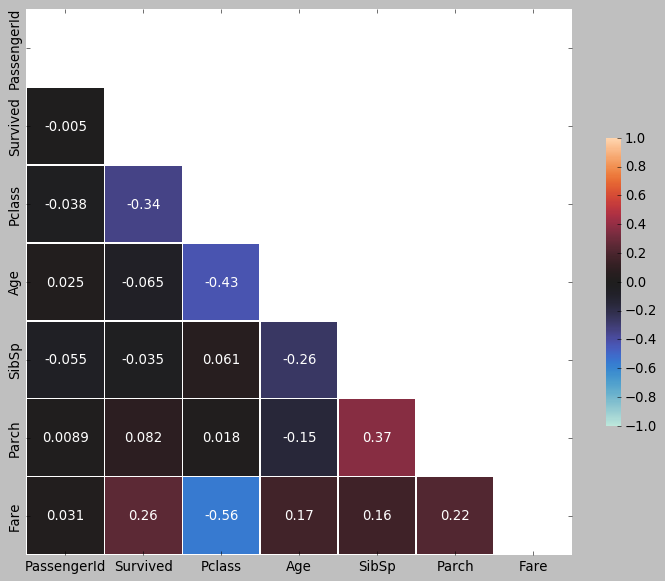

In [320]:
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True)
plt.show()

#### What are the most correlated features?

In [308]:
"""
The most correlated features are:
> Pclass:Fare
> Pclass:Age
> Parch:SibSp
: PClass:Survived
"""

'\nThe most correlated features are:\n> Pclass:Fare\n> Survived:Fare\n> Parch:SibSp\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

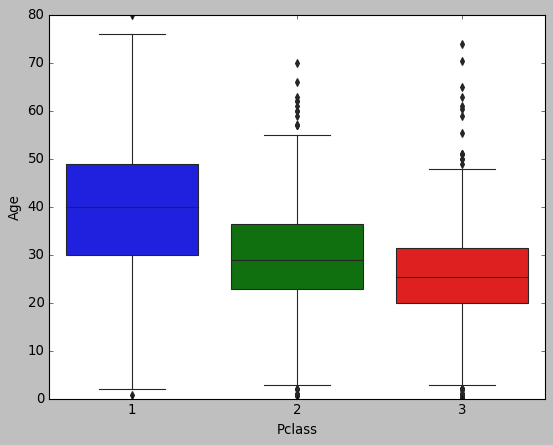

In [328]:
# your code here
sns.boxplot(x="Pclass", y="Age", data=titanic)
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

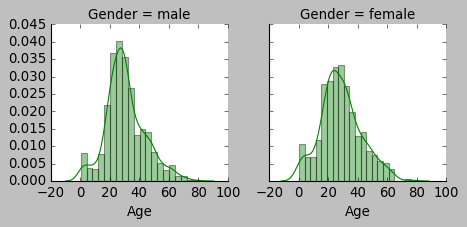

In [339]:
#your code here
g = sns.FacetGrid(titanic, col="Gender")
g = g.map(sns.distplot, "Age", bins=20, color='g')